# Team assignment - Boston 2016

___

## 1 Data Collection and Preparation

___

In [2]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import datetime

### Bike Rentals

Read data on bike rentals:

In [3]:
bike = pd.read_csv("boston_2016.csv")

In [8]:
#for later use
#bike15 = pd.read_csv("boston_2015.csv")
#bike17 = pd.read_csv("boston_2017.csv")
#bike18 = pd.read_csv("boston_2018.csv")
#bike19 = pd.read_csv("boston_2019.csv")

In [9]:
bike.head(5)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber
3,2016-01-01 00:10:22,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber
4,2016-01-01 00:15:36,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer


In [10]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236203 entries, 0 to 1236202
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   start_time          1236203 non-null  object
 1   end_time            1236203 non-null  object
 2   start_station_id    1236203 non-null  int64 
 3   end_station_id      1236203 non-null  int64 
 4   start_station_name  1236203 non-null  object
 5   end_station_name    1236203 non-null  object
 6   bike_id             1236203 non-null  int64 
 7   user_type           1236203 non-null  object
dtypes: int64(3), object(5)
memory usage: 75.5+ MB


Number of entries (1236203) = Non-Null count for all colums, meaning we are not missing any values.

**Cleaning the Dataset:**

The bike dataset does not contain any missing values.

In [11]:
bike.isnull()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1236198,False,False,False,False,False,False,False,False
1236199,False,False,False,False,False,False,False,False
1236200,False,False,False,False,False,False,False,False
1236201,False,False,False,False,False,False,False,False


In [4]:
# Transforming Dtype of start_time/end_time from object to datetime
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236203 entries, 0 to 1236202
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   start_time          1236203 non-null  datetime64[ns]
 1   end_time            1236203 non-null  datetime64[ns]
 2   start_station_id    1236203 non-null  int64         
 3   end_station_id      1236203 non-null  int64         
 4   start_station_name  1236203 non-null  object        
 5   end_station_name    1236203 non-null  object        
 6   bike_id             1236203 non-null  int64         
 7   user_type           1236203 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 75.5+ MB


In [5]:
# Creates column that provides the duration of the rental period
bike['trip_duration'] = bike['end_time']-bike['start_time']
bike.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,trip_duration
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber,0 days 00:32:19
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber,0 days 00:32:08
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber,0 days 00:30:14
3,2016-01-01 00:10:22,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber,0 days 00:29:49
4,2016-01-01 00:15:36,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer,0 days 00:15:41


In [6]:
# Creates coulumn that provides the day of the week ranging from 0 (Monday) to 6 (Sunday)
bike["weekday"] = bike["start_time"].dt.dayofweek
bike.head(60000)

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,trip_duration,weekday
0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber,0 days 00:32:19,4
1,2016-01-01 00:08:19,2016-01-01 00:40:27,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1121,Subscriber,0 days 00:32:08,4
2,2016-01-01 00:10:15,2016-01-01 00:40:29,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,474,Subscriber,0 days 00:30:14,4
3,2016-01-01 00:10:22,2016-01-01 00:40:11,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1504,Subscriber,0 days 00:29:49,4
4,2016-01-01 00:15:36,2016-01-01 00:31:17,36,67,Boston Public Library - 700 Boylston St.,MIT at Mass Ave / Amherst St,913,Customer,0 days 00:15:41,4
...,...,...,...,...,...,...,...,...,...,...
59995,2016-03-28 16:30:21,2016-03-28 16:32:40,91,80,One Kendall Square at Hampshire St / Portland St,MIT Stata Center at Vassar St / Main St,769,Customer,0 days 00:02:19,0
59996,2016-03-28 16:31:49,2016-03-28 16:36:49,108,115,Harvard University / SEAS Cruft-Pierce Halls a...,Porter Square Station,1109,Subscriber,0 days 00:05:00,0
59997,2016-03-28 16:32:14,2016-03-28 16:40:06,189,88,Kendall T,Inman Square at Vellucci Plaza / Hampshire St,1051,Subscriber,0 days 00:07:52,0
59998,2016-03-28 16:32:28,2016-03-28 16:42:43,22,38,South Station - 700 Atlantic Ave.,TD Garden - Causeway at Portal Park #2,1081,Subscriber,0 days 00:10:15,0


**Elimination**

In [7]:
# Dropping entries with negative trip duration
bike = bike[bike['trip_duration'] >= pd.Timedelta(0)]
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236200 entries, 0 to 1236202
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   start_time          1236200 non-null  datetime64[ns] 
 1   end_time            1236200 non-null  datetime64[ns] 
 2   start_station_id    1236200 non-null  int64          
 3   end_station_id      1236200 non-null  int64          
 4   start_station_name  1236200 non-null  object         
 5   end_station_name    1236200 non-null  object         
 6   bike_id             1236200 non-null  int64          
 7   user_type           1236200 non-null  object         
 8   trip_duration       1236200 non-null  timedelta64[ns]
 9   weekday             1236200 non-null  int64          
dtypes: datetime64[ns](2), int64(4), object(3), timedelta64[ns](1)
memory usage: 103.7+ MB


In [8]:
# Dropping entries for which trip_duration is more than a week
one_week = datetime.timedelta(days=7)

bike = bike[bike['trip_duration'] <= one_week]
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236059 entries, 0 to 1236202
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   start_time          1236059 non-null  datetime64[ns] 
 1   end_time            1236059 non-null  datetime64[ns] 
 2   start_station_id    1236059 non-null  int64          
 3   end_station_id      1236059 non-null  int64          
 4   start_station_name  1236059 non-null  object         
 5   end_station_name    1236059 non-null  object         
 6   bike_id             1236059 non-null  int64          
 7   user_type           1236059 non-null  object         
 8   trip_duration       1236059 non-null  timedelta64[ns]
 9   weekday             1236059 non-null  int64          
dtypes: datetime64[ns](2), int64(4), object(3), timedelta64[ns](1)
memory usage: 103.7+ MB


In [10]:
bike.to_csv('Pred_Model.csv')

___

### Weather

Read weather data:

In [17]:
weatherhour = pd.read_csv("weather_hourly_boston.csv")

In [18]:
weatherhour.head(3)

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,-1.1,-1.1,0.0
1,2015-01-02 02:00:00,-1.1,-1.1,0.0
2,2015-01-02 03:00:00,-0.6,-0.6,0.0


In [19]:
weatherhour.describe()

,max_temp,min_temp,precip
count,43354.000000,43354.000000,43356.000000
mean,11.456717,11.395922,0.095581
std,10.118606,10.114095,0.294019
min,-22.800000,-22.800000,0.000000
25%,3.300000,3.300000,0.000000
50%,11.700000,11.700000,0.000000
75%,20.000000,19.850000,0.000000
max,36.100000,36.100000,1.000000


In [20]:
weatherhour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43354 non-null  object 
 1   max_temp   43354 non-null  float64
 2   min_temp   43354 non-null  float64
 3   precip     43356 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


Number of entries (43848) != Non-Null count for all colums, meaning we are (!) missing values.

In [21]:
#transforming Dtype of date_time from object to datetime
weatherhour['date_time'] = pd.to_datetime(weatherhour['date_time'])
weatherhour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  43354 non-null  datetime64[ns]
 1   max_temp   43354 non-null  float64       
 2   min_temp   43354 non-null  float64       
 3   precip     43356 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.3 MB


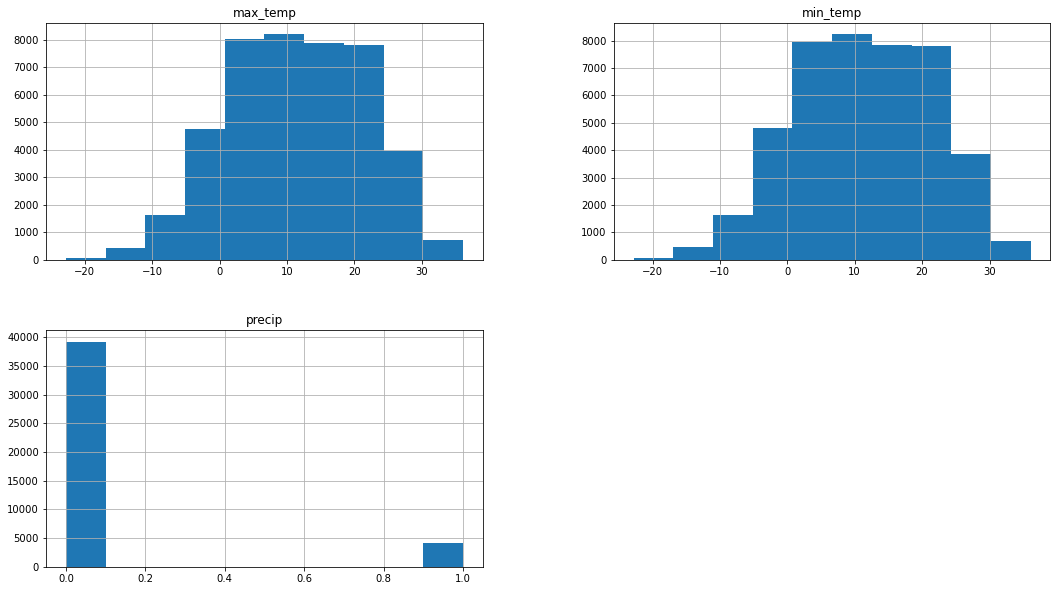

In [22]:
# Histogram of all numeric fields
weatherhour_hist = weatherhour.drop(columns=['date_time'],axis=1)
weatherhour_hist.hist(figsize=(18,10));

**Cleaning the Dataset:**

In [23]:
weatherhour.isnull()

,date_time,max_temp,min_temp,precip
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
43843,False,False,False,False
43844,False,False,False,False
43845,False,False,False,False
43846,False,False,False,False


Mostly, for given entries values are missing for all attributes.

In [24]:
# Display entries with NaN values
NaN_for_attribute = weatherhour[weatherhour["date_time"].isna()] #insert any attribute
NaN_for_attribute

,date_time,max_temp,min_temp,precip
98,NaT,NaN,NaN,NaN
145,NaT,NaN,NaN,NaN
304,NaT,NaN,NaN,NaN
395,NaT,NaN,NaN,NaN
588,NaT,NaN,NaN,NaN
...,...,...,...,...
43019,NaT,NaN,NaN,NaN
43428,NaT,NaN,NaN,NaN
43570,NaT,NaN,NaN,NaN
43594,NaT,NaN,NaN,NaN


**Elimination**

In [25]:
# Dropping rows with missing values
weatherhour.dropna(axis=0, inplace=True)
NaN_for_attribute = weatherhour[weatherhour["date_time"].isna()] #insert any attribute
NaN_for_attribute

,date_time,max_temp,min_temp,precip


In [26]:
weatherhour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43354 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  43354 non-null  datetime64[ns]
 1   max_temp   43354 non-null  float64       
 2   min_temp   43354 non-null  float64       
 3   precip     43354 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.7 MB


In [27]:
# Dropping duplicates (date_time)
# Only date_time is faulty, dropping duplicates leads to less data! 
# We should fix this by just manipulating the entries in the date_time column.
weatherhour.drop_duplicates(subset='date_time', keep='first', inplace=True, ignore_index=False)
weatherhour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40889 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  40889 non-null  datetime64[ns]
 1   max_temp   40889 non-null  float64       
 2   min_temp   40889 non-null  float64       
 3   precip     40889 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.6 MB


**Imputation** <br>
To maintain the completeness of the time series dataset, we have decided to impute missing values.

In [28]:
# Extending the dataframe with missing time stamps
# Set the index to the datetime column
weatherhour.index = pd.to_datetime(weatherhour['date_time'])

# Generate a sequence of hourly dates between the start and end dates of the data
dates = pd.date_range(start=weatherhour.index.min(), end=weatherhour.index.max(), freq='H')

# Reindex the dataframe with the new dates
weatherhour = weatherhour.reindex(dates)

weatherhour.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43848 entries, 2015-01-01 06:00:00 to 2020-01-02 05:00:00
Freq: H
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  40889 non-null  datetime64[ns]
 1   max_temp   40889 non-null  float64       
 2   min_temp   40889 non-null  float64       
 3   precip     40889 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.7 MB


In [29]:
weatherhour.head()

,date_time,max_temp,min_temp,precip
2015-01-01 06:00:00,2015-01-01 06:00:00,-5.6,-5.6,0.0
2015-01-01 07:00:00,2015-01-01 07:00:00,-5.6,-5.6,0.0
2015-01-01 08:00:00,2015-01-01 08:00:00,-5.6,-5.6,0.0
2015-01-01 09:00:00,2015-01-01 09:00:00,-4.4,-4.4,0.0
2015-01-01 10:00:00,2015-01-01 10:00:00,-5.6,-5.6,0.0


In [30]:
# Deletes date_time column as it is now our index
weatherhour.drop('date_time', axis=1, inplace=True)

In [31]:
weatherhour.head()

,max_temp,min_temp,precip
2015-01-01 06:00:00,-5.6,-5.6,0.0
2015-01-01 07:00:00,-5.6,-5.6,0.0
2015-01-01 08:00:00,-5.6,-5.6,0.0
2015-01-01 09:00:00,-4.4,-4.4,0.0
2015-01-01 10:00:00,-5.6,-5.6,0.0


In [32]:
# Imputing missing values by means of interpolation
weatherhour['interp_maxtemp']  = weatherhour['max_temp'].interpolate()   # mean of prev/next
weatherhour['interp_mintemp']  = weatherhour['min_temp'].interpolate()   # mean of prev/next
weatherhour['interp_precip']  = weatherhour['precip'].interpolate()   # mean of prev/next
weatherhour['update_maxtemp'] = weatherhour['interp_maxtemp']
weatherhour['update_maxtemp'].update( weatherhour['max_temp'] )  # note: this is an inplace operation
weatherhour['update_mintemp'] = weatherhour['interp_mintemp']
weatherhour['update_mintemp'].update( weatherhour['min_temp'] )  # note: this is an inplace operation
weatherhour['update_precip'] = weatherhour['interp_precip']
weatherhour['update_precip'].update( weatherhour['precip'] )  # note: this is an inplace operation
weatherhour.head(98)

,max_temp,min_temp,precip,interp_maxtemp,interp_mintemp,interp_precip,update_maxtemp,update_mintemp,update_precip
2015-01-01 06:00:00,-5.6,-5.6,0.0,-5.60,-5.60,0.0,-5.60,-5.60,0.0
2015-01-01 07:00:00,-5.6,-5.6,0.0,-5.60,-5.60,0.0,-5.60,-5.60,0.0
2015-01-01 08:00:00,-5.6,-5.6,0.0,-5.60,-5.60,0.0,-5.60,-5.60,0.0
2015-01-01 09:00:00,-4.4,-4.4,0.0,-4.40,-4.40,0.0,-4.40,-4.40,0.0
2015-01-01 10:00:00,-5.6,-5.6,0.0,-5.60,-5.60,0.0,-5.60,-5.60,0.0
...,...,...,...,...,...,...,...,...,...
2015-01-05 03:00:00,NaN,NaN,NaN,10.85,10.60,1.0,10.85,10.60,1.0
2015-01-05 04:00:00,10.6,10.6,1.0,10.60,10.60,1.0,10.60,10.60,1.0
2015-01-05 05:00:00,10.0,10.0,0.0,10.00,10.00,0.0,10.00,10.00,0.0
2015-01-05 06:00:00,NaN,NaN,NaN,8.35,8.35,0.0,8.35,8.35,0.0


In [33]:
weatherhour.to_csv('weather_hourly.csv')

___

### Stations

In [34]:
stations = pd.read_csv("current_bluebikes_stations.csv")
stations.head()

,Number,Name,Latitude,Longitude,District,Public,Total docks,Deployment Year
0,K32015,1200 Beacon St,42.344149,-71.114674,Brookline,Yes,15,2021.0
1,W32006,160 Arsenal,42.364664,-71.175694,Watertown,Yes,11,2021.0
2,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,17,2014.0
3,S32035,191 Beacon St,42.380323,-71.108786,Somerville,Yes,19,2018.0
4,C32094,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Boston,Yes,17,2020.0


In [35]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Number           448 non-null    object 
 1   Name             448 non-null    object 
 2   Latitude         448 non-null    float64
 3   Longitude        448 non-null    float64
 4   District         444 non-null    object 
 5   Public           448 non-null    object 
 6   Total docks      448 non-null    int64  
 7   Deployment Year  443 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 28.1+ KB


In [36]:
NaN_for_attribute2 = stations[stations["Deployment Year"].isna()] # Gives entries with NaN for 'Deployment Year'
NaN_for_attribute2

,Number,Name,Latitude,Longitude,District,Public,Total docks,Deployment Year
7,S32049,515 Somerville Ave (Temp. Winter Location),42.383227,-71.106069,NaN,Yes,19,NaN
65,D32056,Boylston St at Charles St,42.352576,-71.067644,Boston,Yes,31,NaN
83,S32044,Broadway Opposite Norwood Ave (Temp Winter St...,42.396764,-71.102376,Somerville,Yes,15,NaN
236,M32083,John Ahern Field at Kennedy-Longfellow School,42.369036,-71.086310,NaN,Yes,19,NaN
401,S32042,Trum Field @ Cedar St (Temp Winter Station),42.398444,-71.107833,Somerville,Yes,19,NaN


In [37]:
stations.describe()

,Latitude,Longitude,Total docks,Deployment Year
count,448.000000,448.000000,448.000000,443.000000
mean,42.358543,-71.086609,15.200893,2016.911964
std,0.045132,0.053397,7.490175,3.624816
min,42.255600,-71.247759,0.000000,2011.000000
25%,42.336632,-71.116872,14.000000,2013.000000
50%,42.357181,-71.087356,15.000000,2018.000000
75%,42.379747,-71.063142,19.000000,2020.000000
max,42.534669,-70.870214,53.000000,2022.000000


## 2 Descriptive Analytics

___

### KPI Dashboard - Real-time KPIs

**Total number of hourly rentals:**

We calculate the total number of rentals per hour and plot the results over the full time range of the given data (2016-01-01 to 2016-12-31). It can be observed that total demand for rentals is much higher in the summer months and drops significantly during the winter period.

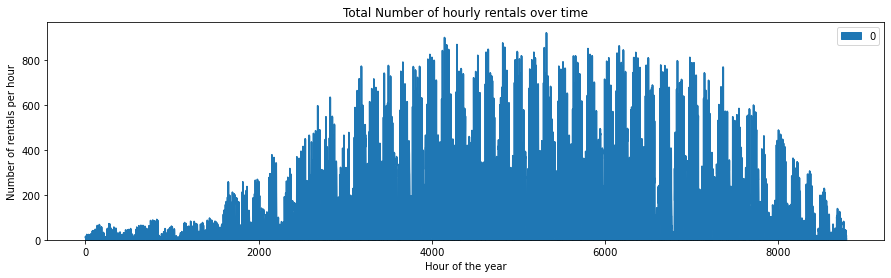

In [38]:
# Create a new column with the hour of the start time
bike['hourofyear'] = bike['start_time'].dt.dayofyear * 24 - 24 + bike['start_time'].dt.hour 

# Group the data by the date and hour of the start time and count the number of entries in each group
bikeplot = bike.groupby([bike['hourofyear']]).size()
bikeplot = bikeplot.to_frame()

# Create a new DataFrame with a sequential index that covers the full range of hours of the year
index = range(bike['hourofyear'].min(), bike['hourofyear'].max()+1)
seqhoy = pd.DataFrame(index=index)

# Merge the bikeplot DataFrame with the new DataFrame using a left join
seqhoy = seqhoy.merge(bikeplot, left_index=True, right_index=True, how='left')

# Fill any missing values with 0
seqhoy = seqhoy.fillna(0)

# Plot the resulting DataFrame
fig, ax = plt.subplots(figsize=(15, 4))
seqhoy.plot.area(ax=ax)
plt.title('Total Number of hourly rentals over time')
ax.set_ylabel('Number of rentals per hour')
ax.set_xlabel('Hour of the year')
plt.show()

**Fleet usage:**

In [39]:
# Total number of added docks per year
total_dock_size = stations.groupby('Deployment Year')['Total docks'].sum()
total_dock_size
# Total dock size in 2016 (assuming there was no loss of formerly built docks and all the docks added in 2016 were added at the beginning of the year)
ds_2016 = sum(total_fleet_size[0:2016])
print('Total dock size in 2016:')
print(ds_2016)

bikenr = bike['bike_id'].unique()
bikenr = pd.DataFrame(bikenr)
bikenr.info()
# Total fleet size in 2016 is 1802 bikes (assuming there were no bikes disposed of) and all bikes were operational at the beginning of the year
fs_2016 = 1802
print('Total fleet size in 2016:')
print(fs_2016)

NameError: name 'total_fleet_size' is not defined

In [40]:
# Create a list of timestamps from 2016-01-01 00:00:00 to 2017-01-01 00:00:00
timestamps = pd.date_range(start='2016-01-01 00:00:00', end='2017-01-01 00:00:00', freq='1H')

# Initialize an empty list to store the number of entries for each timestamp
num_entries = []

# Iterate over the timestamps
for point_in_time in timestamps:
    # Create a boolean series indicating whether the point in time is between the start and end time for each entry
    mask = (bike['start_time'] <= point_in_time) & (point_in_time <= bike['end_time'])
    # Count the number of entries where the point in time is between start and end time
    n = mask.sum() / fs_2016 * 100
    # Append the count to the list
    num_entries.append(n)

# Plot the number of entries over time
fig, ax = plt.subplots(figsize=(15, 4))
plt.plot(timestamps, num_entries)
plt.xlabel('Timestamp')
plt.ylabel('Percentage of fleet usage')
plt.show()

NameError: name 'fs_2016' is not defined

In [ ]:
# Define function to get average of a list
def Average(lst):
    return sum(lst) / len(lst)
print('Average fleet usage (%) is:')
Average(num_entries)

**Hourly revenue:**

You can find more on bluebikes pricing information at: https://www.bluebikes.com/pricing/single-trip

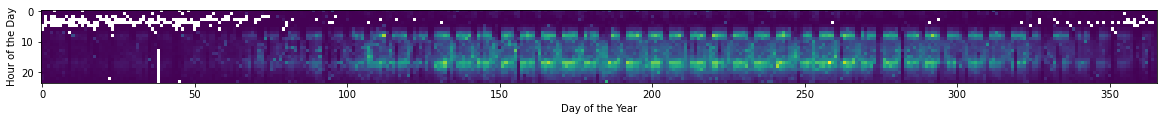

In [42]:
# Calculate the revenue in dollars
bike['revenue'] = np.where(bike['trip_duration'] <= pd.Timedelta(minutes=30), 2.95,
                        np.where(bike['trip_duration'] <= pd.Timedelta(minutes=60), 5.45,
                                 5.45 + 2.5 * np.ceil((bike['trip_duration'].dt.total_seconds() - 60 * 60) / (30 * 60))))

# Group the data by hour and day of the year, and sum the revenue for each hour
hourly_revenue = bike.groupby([bike['end_time'].dt.dayofyear.rename('dayofyear'), bike['end_time'].dt.hour.rename('hour')])['revenue'].sum().reset_index()

# Create a pivot table of the hourly revenue, with the hours as the index and the days of the year as the columns
hourly_revenue_pivot = hourly_revenue.pivot(index='dayofyear', columns='hour', values='revenue')

# Create a heatmap of the pivot table
plt.figure(figsize=(20, 10))
plt.imshow(hourly_revenue_pivot.T, cmap='viridis')
plt.xlabel('Day of the Year')
plt.ylabel('Hour of the Day')
plt.show()

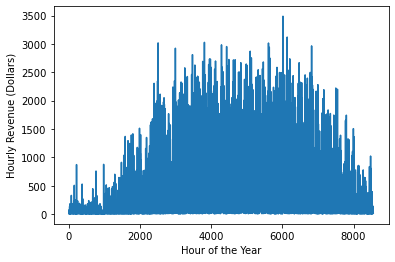

In [ ]:
# Reshape the hourly revenue data to have one row for each hour of the year
hourly_revenue_reshaped = hourly_revenue.pivot(index='dayofyear', columns='hour', values='revenue').reset_index(drop=True).stack().reset_index()

# Rename the columns
hourly_revenue_reshaped.columns = ['hour', 'dayofyear', 'revenue']

# Plot the hourly revenue over the year 2016
plt.plot(hourly_revenue_reshaped['revenue'])
plt.xlabel('Hour of the Year')
plt.ylabel('Hourly Revenue (Dollars)')
plt.show()

### Weather variation during a day 

In [ ]:
weatherhour = weatherhour.drop(columns = ['max_temp','min_temp','precip','interp_maxtemp','interp_mintemp','interp_precip'])
weatherhour_2016 = weatherhour.loc['2016-01-01 00:00:00' : '2016-12-31 23:00:00']
weatherhour_2016 = weatherhour_2016.drop(columns = ['update_mintemp', 'update_precip'])

#### Temperature over the year

In [ ]:
plt.figure(figsize=(30, 5))
plt.plot(weatherhour_2016)
plt.xlabel('Hour of the Year')
plt.ylabel('Temperature (°C)')
plt.show()    

#### Temperature over one month

In [ ]:
plt.figure(figsize=(30, 5))
plt.plot(weatherhour_2016.loc['2016-01-01 00:00:00' : '2016-02-01 23:00:00'])
plt.xlabel('Hour of the Year')
plt.ylabel('Temperature (°C)')
plt.show()   

### KPI Dashboard - Additional KPIs

**Average Usage Time...**

In [44]:
# Merging bike and staion datasets
stations.rename(columns={'Name': 'start_station_name'}, inplace=True)
bike_station = pd.merge(bike, stations, on='start_station_name')

In [1]:
bike_station.head()

NameError: name 'bike_station' is not defined

**... based on Time of Day:**

In [45]:
bike_station.groupby(bike_station['start_time'].dt.hour)['trip_duration'].mean()

bs_hour = bike_station
# Extract hour from the timestamp and store it in a new column
bs_hour['hour'] = bs_hour['start_time'].dt.hour

# Convert the timedelta values to minutes if they are less than 1 day
# This excludes entries with trip duration > 7 day
threshold = np.timedelta64(2, 'h')
bs_hour['td_min'] = np.where(bs_hour['trip_duration'] < threshold,
bs_hour['trip_duration'].dt.total_seconds() / 60, np.nan)

# Plotting
rcParams['figure.figsize'] = 15, 5
sns.boxplot(x='hour', y='td_min', data=bs_hour)
plt.title('Usage time by Hour')
plt.xlabel('Hour of the day')
plt.ylabel('Usage time (max. 120 minutes)')
plt.show()

DataError: No numeric types to aggregate

**... based on User Type:**

In [ ]:
# Plotting
rcParams['figure.figsize'] = 15, 5
sns.boxplot(x='user_type', y='td_min', data=bs_hour)
plt.title('Usage time by type of user')
plt.xlabel('User type')
plt.ylabel('Usage time (minutes)')
plt.show()

**... based on District:**

In [ ]:
# Plotting
rcParams['figure.figsize'] = 15, 5
sns.boxplot(x='District', y='td_min', data=bs_hour)
plt.title('Usage time by district')
plt.xlabel('District')
plt.ylabel('Usage time (minutes)')
plt.setp(plt.gca().get_xticklabels(), rotation=45)
plt.show()

**Maintenance Management: Total Duration of Usage Time per Bike:**

In [ ]:
time_in_use = bike_station.groupby('bike_id')['trip_duration'].sum().reset_index()
time_in_use.sort_values('trip_duration', ascending=False)

**Most common Trips...**

In [ ]:
#add a new column with a unique trip ID consisting of the start staion and end station ID
bike_tripid = bike
bike_tripid["trip_id"] = bike_tripid["start_station_id"].astype(str) + "-" + bike_tripid["end_station_id"].astype(str) 
bike_tripid.head(5)

...in the entire Year: 

In [ ]:
#create a list of the most common trips and sort by their frequency 
bike_tripid_max = bike_tripid.trip_id.value_counts()[:10000000].to_frame().rename(columns={"trip_id": "counts"}).reset_index().rename(columns={"index": "trip_id"})

#merge the respective start and end name of the station for better identification of the route 
bike_tripid_max = pd.merge(bike_tripid_max,
                bike_tripid[['trip_id', 'start_station_name', 'end_station_name']],
                on='trip_id',
                how='left')

#eliminate duplicates by the merge and reindex
bike_tripid_max = bike_tripid_max.drop_duplicates(subset=['trip_id'], ignore_index=True)

#swap columns for better overview 
bike_tripid_max = bike_tripid_max[["counts", "trip_id", "start_station_name", "end_station_name"]]

bike_tripid_max.head(10)


...for each Hour of the Day:

In [ ]:
bike_tripid_hour = bike_tripid
# Extract hour from the timestamp and store it in a new column
bike_tripid_hour['hour'] = bike_tripid_hour['start_time'].dt.hour

#group by hour and show most common trip ID
bike_tripid_hour = bike_tripid_hour.groupby('hour')['trip_id'].agg(pd.Series.mode).to_frame().reset_index()
bike_tripid_hour

#merge start station and end station names
bike_tripid_hour = pd.merge(bike_tripid_hour,
                    bike_tripid[['trip_id', 'start_station_name', 'end_station_name']],
                    on='trip_id',
                    how='left')

#eliminate duplicates by the merge and reindex
bike_tripid_hour = bike_tripid_hour.drop_duplicates(subset=['hour'], ignore_index=True)

bike_tripid_hour

...for each Month:

In [ ]:
#Create a list that shows the most frequent trips by month and merge the station names
bike_tripid_max_M = bike_tripid.groupby([pd.Grouper(key='start_time',freq='M')]).trip_id.agg(pd.Series.mode).to_frame().reset_index().rename(columns={"index": "start_time"})
bike_tripid_max_M = pd.merge(bike_tripid_max_M,
                bike_tripid[['trip_id', 'start_station_name', 'end_station_name']],
                on='trip_id',
                how='left')
bike_tripid_max_M = bike_tripid_max_M.drop_duplicates(subset=['start_time'], ignore_index=True)
bike_tripid_max_M

In [ ]:
#alternative with sort and chart input: more values per month but merge of station names does not work for me

#group by month and show most common trips for each month
bikeplot_tripid = bike_tripid.groupby(bike["start_time"].rename('Month').dt.month).trip_id.value_counts().to_frame().rename(columns={"trip_id": "counts"})
bikeplot_tripid

#show only the three most frequent trips for each month
bikeplot_tripid_3 = bikeplot_tripid.groupby(level=0, group_keys=False).apply(lambda x: x.sort_values('counts', ascending=False)).groupby(level=0).head(3)
bikeplot_tripid_3

In [ ]:
##need to be better plotted

#show three most common trips per month and respective counts
bikeplot_tripid_3 = bikeplot_tripid_3.reset_index()
bikeplot_tripid_3

plt.figure(figsize=(10,4))
sns.barplot(data = bikeplot_tripid_3, x="Month", y="counts", hue="trip_id")

...for each Week:

In [ ]:
#if two or more trips have the same count then only first value is taken in order to match station names. In monthly view this was not the case because there were no double mode values
bike_tripid_max_W = bike_tripid.groupby([pd.Grouper(key='start_time',freq='W')]).trip_id.agg(lambda x: pd.Series.mode(x)[0]).to_frame().reset_index().rename(columns={"index": "start_time"})

bike_tripid_max_W = pd.merge(bike_tripid_max_W,
               bike_tripid[['trip_id', 'start_station_name', 'end_station_name']],
               on='trip_id',
               how='left')

bike_tripid_max_W = bike_tripid_max_W.drop_duplicates(subset=['start_time'], ignore_index=True)
bike_tripid_max_W.head(10)


...for each Day:

In [ ]:
bike_tripid_max_D = bike_tripid.groupby([pd.Grouper(key='start_time',freq='D')]).trip_id.agg(lambda x: pd.Series.mode(x)[0]).to_frame().reset_index().rename(columns={"index": "start_time"})
bike_tripid_max_D = pd.merge(bike_tripid_max_D,
               bike_tripid[['trip_id', 'start_station_name', 'end_station_name']],
               on='trip_id',
               how='left')
bike_tripid_max_D = bike_tripid_max_D.drop_duplicates(subset=['start_time'], ignore_index=True)
bike_tripid_max_D

___


### Temporal Demand Patterns and Seasonality

In the following, we want to demonstrate how fleet usage varies with regard to different temporal constellations.

**Fleet Usage Variation during a Day**

Here we calculate the average amount of bookings (counted with start_time) per hour of a day to show how fleet usage changes during a day. We can observe, that there is higher demand for bikes during daytime than at night. Moreover we can see peaks of usage within the so-called 'rush hours': demand for bikes is the highest at 8 am, when people have to get to work, and at 5 pm, when people want to go back to their homes after work.


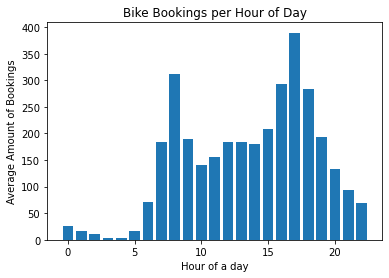

In [46]:
#Count bookings per start_time for each hour of a day (0-23)
#Devide by 365 to get a daily average
hour_of_a_day = []
for i in range(0,23):
    hour_of_a_day.append([i, bike['start_time'].loc[(bike['start_time'].dt.hour) == i].count()/365])
hour_of_a_day = pd.DataFrame(hour_of_a_day)

# Plotting
plt.bar(hour_of_a_day[0], hour_of_a_day[1])
plt.title('Bike Bookings per Hour of Day')
plt.xlabel('Hour of a day')
plt.ylabel('Average Amount of Bookings')
plt.show()


**Fleet Usage Variation during a Week**

Here we calculate the average amount of bookings (counted with start_time) per day of a week (Monday to Sunday) to show how fleet usage changes during a week. We can observe, that there is higher demand for bikes during the week than on weekends. This aligns quite well wtih the findings of the daily variation of fleet usage - bike demand seems to be heavily driven by work.


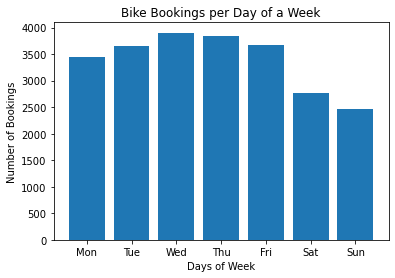

In [47]:
#Count bookings per start_time for each day of a week
#Devide by 52 to get an average value for a week
bike_day_of_a_week = []
for i in range(0,7):
    bike_day_of_a_week.append([i,bike['start_time'].loc[(bike['start_time'].dt.dayofweek) == i].count()/52])
bike_day_of_a_week = pd.DataFrame(bike_day_of_a_week)

#Plotting
days_of_a_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.bar(days_of_a_week,bike_day_of_a_week[1])
plt.title('Bike Bookings per Day of a Week')
plt.xlabel('Days of Week')
plt.ylabel('Number of Bookings')
plt.show()


**Fleet Usage Variation during a Year**

Here we calculate the total amount of bookings (counted with start_time) on a monthly basis to show how fleet usage changes during a year. We can observe, that there is significantly higher demand for bikes in summer months than during winter. This seems all too understandable, as the weather and temperatures in summer tend to invite cycling


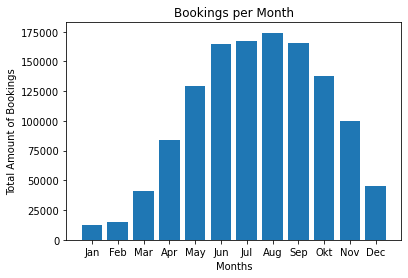

In [48]:
#Count the number of bookings on a monthly basis
bike.index = bike.start_time
bike_month = pd.Series(bike['start_time'].resample('1M').count())

#Plotting
months =['Jan', 'Feb', 'Mar', 'Apr', 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Okt' , 'Nov' , 'Dec']
plt.bar(months,bike_month)
plt.title('Bookings per Month')
plt.xlabel('Months')
plt.ylabel('Total Amount of Bookings')
plt.show()

___

### Geographical Demand Patterns

**Locations of all Bike Stations:**

To display the interactive map, you´ll need the folium package. Just type this into the anaconda prompt:<b>
conda install -c conda-forge folium

In [49]:
# Only keep entries with Deployment Year <= 2016
stations2016 = stations.loc[stations['Deployment Year'].isin([2011, 2016])]
stations2016

,Number,start_station_name,Latitude,Longitude,District,Public,Total docks,Deployment Year
22,A32032,Airport T Stop - Bremen St at Brooks St,42.374103,-71.032764,Boston,Yes,11,2016.0
24,M32046,Alewife MBTA at Steel Place,42.395588,-71.142606,Cambridge,Yes,19,2016.0
31,B32004,Aquarium T Stop - 200 Atlantic Ave,42.359912,-71.051430,Boston,Yes,23,2011.0
32,D32004,Arch St at Franklin St,42.355335,-71.058229,Boston,Yes,0,2011.0
38,A32003,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,Boston,Yes,11,2011.0
...,...,...,...,...,...,...,...,...
427,C32084,Washington St at Fuller St,42.281986,-71.071479,Boston,Yes,0,2011.0
428,C32005,Washington St at Lenox St,42.335099,-71.079038,Boston,Yes,15,2016.0
431,C32006,Washington St at Rutland St,42.338515,-71.074041,Boston,Yes,27,2011.0
435,D32002,Washington St at Waltham St,42.341575,-71.068904,Boston,Yes,15,2011.0


Note that there was a station created in Watertown in 2016 but the district is not included in our rental dataset:

In [50]:
print('Districts of stations operational until (incl.) 2016:')
print(stations2016['District'].unique())
print('')
print('Districts of stations included in our rental data:')
print(bike_station['District'].unique())

Districts of stations operational until (incl.) 2016:
['Boston' 'Cambridge' 'Somerville' 'Brookline' 'Watertown']

Districts of stations included in our rental data:
['Cambridge' 'Boston' 'Somerville' 'Brookline']


It's obvious that the majority of stations in in the Boston main area. Up until 2016 there was only a handful of stations in certain districts adjacent to the Boston district.

In [51]:
import folium
#Sets the center of the map
loc_center = [stations2016['Latitude'].mean(), stations2016['Longitude'].mean()] #Sets the center of the map

#Creates map
map1 = folium.Map(location = loc_center, tiles='Openstreetmap', zoom_start = 11, control_scale=True)
#Creates Markers for the bike stations
for index, loc in stations2016.iterrows():
    if loc['District'] == 'Brookline':
        folium.CircleMarker([loc['Latitude'], loc['Longitude']],radius=2, weight=5, color="purple", popup=loc['start_station_name']).add_to(map1)
    if loc['District'] == 'Boston':
        folium.CircleMarker([loc['Latitude'], loc['Longitude']],radius=2, weight=5, color="green", popup=loc['start_station_name']).add_to(map1)
    if loc['District'] == 'Somerville':
        folium.CircleMarker([loc['Latitude'], loc['Longitude']],radius=2, weight=5, color="yellow", popup=loc['start_station_name']).add_to(map1)
    if loc['District'] == 'Cambridge':
        folium.CircleMarker([loc['Latitude'], loc['Longitude']],radius=2, weight=5, color="red", popup=loc['start_station_name']).add_to(map1)
    if loc['District'] == 'Watertown':
        folium.CircleMarker([loc['Latitude'], loc['Longitude']],radius=2, weight=5, color="orange", popup=loc['start_station_name']).add_to(map1)
        
folium.LayerControl().add_to(map1)

print('Legend:')
print('Boston: Green')
print('Brookline: Purple')
print('Cambridge: Red')
print('Somerville: Yellow')
print('Watertown: Orange')

map1

Legend:
Boston: Green
Brookline: Purple
Cambridge: Red
Somerville: Yellow
Watertown: Orange


## 3 Cluster Analysis

___

## Cluster on Locations - Starting Points

In [52]:
bike_station.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,trip_duration,weekday,hourofyear,revenue,Number,Latitude,Longitude,District,Public,Total docks,Deployment Year
0,2016-01-01 00:25:13,2016-01-01 00:43:06,107,176,Ames St at Main St,Lesley University,204,Subscriber,00:17:53,4,0,2.95,M32037,42.3625,-71.08822,Cambridge,Yes,19,2012.0
1,2016-01-01 08:49:02,2016-01-01 09:09:45,107,73,Ames St at Main St,Harvard Square at Brattle St / Eliot St,1495,Customer,00:20:43,4,8,2.95,M32037,42.3625,-71.08822,Cambridge,Yes,19,2012.0
2,2016-01-01 16:11:27,2016-01-01 16:15:12,107,117,Ames St at Main St,Binney St / Sixth St,985,Subscriber,00:03:45,4,16,2.95,M32037,42.3625,-71.08822,Cambridge,Yes,19,2012.0
3,2016-01-01 16:17:39,2016-01-01 17:44:18,107,110,Ames St at Main St,Harvard University Gund Hall at Quincy St / Ki...,1293,Subscriber,01:26:39,4,16,7.95,M32037,42.3625,-71.08822,Cambridge,Yes,19,2012.0
4,2016-01-01 16:18:19,2016-01-01 17:44:36,107,110,Ames St at Main St,Harvard University Gund Hall at Quincy St / Ki...,1281,Subscriber,01:26:17,4,16,7.95,M32037,42.3625,-71.08822,Cambridge,Yes,19,2012.0


In [53]:
#Analog zur Vorlesung Data Preparation and Scaling
from sklearn.preprocessing import StandardScaler

clusterLocation = pd.DataFrame({'Longitude' : bike_station['Longitude'], 'Latitude' : bike_station['Latitude']})
#clusterLocation.dropna(axis= 0)
#clusterLocation = clusterLocation.reset_index(drop=True)

scaler = StandardScaler()
scaler.fit(clusterLocation)
clusterLocation_scaled = scaler.transform(clusterLocation)
clusterLocation_scaled_df = pd.DataFrame(clusterLocation_scaled, columns=clusterLocation.columns, index=clusterLocation.index)
#clusterLocation_scaled_df = clusterLocation_scaled_df.reset_index(drop=True)
clusterLocation_scaled_df.head()

,Longitude,Latitude
0,0.409772,-0.381378
1,0.409772,-0.381378
2,0.409772,-0.381378
3,0.409772,-0.381378
4,0.409772,-0.381378


In [54]:
clusterLocation_scaled_df.describe()

,Longitude,Latitude
count,5.189630e+05,5.189630e+05
mean,-1.418273e-12,4.802022e-13
std,1.000001e+00,1.000001e+00
min,-3.176202e+00,-5.327386e+00
25%,-7.811396e-01,-4.855065e-01
50%,-1.561902e-01,-1.155233e-01
75%,4.960849e-01,5.208360e-01
max,4.172178e+00,3.288643e+00


In [55]:
clusterLocation_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518963 entries, 0 to 518962
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Longitude  518963 non-null  float64
 1   Latitude   518963 non-null  float64
dtypes: float64(2)
memory usage: 11.9 MB


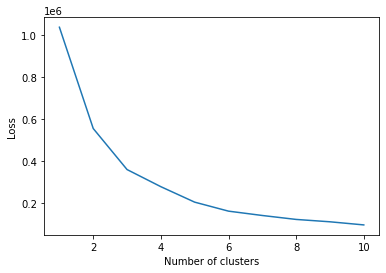

In [56]:
from sklearn.cluster import KMeans
k_max = 10 #möglicherweise ändern

clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(clusterLocation_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)
    
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

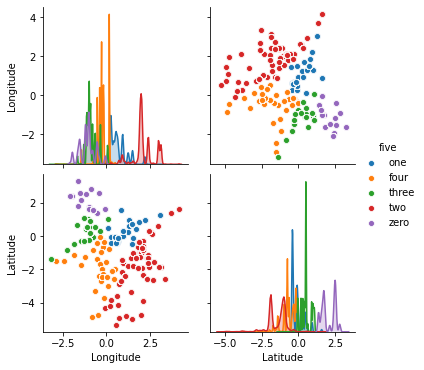

In [57]:
# refit algorithm
five_means = KMeans(n_clusters=5)
five_means.fit(clusterLocation_scaled)

numbers = ["zero", "one", "two", "three", "four", "five", "six"]

clusterLocation_scaled_df["five"] = five_means.predict(clusterLocation_scaled)
clusterLocation_scaled_df["five"] = clusterLocation_scaled_df["five"].apply(lambda x: numbers[x])
sns.pairplot(data=clusterLocation_scaled_df, hue="five")

How to interpret the clusters? Maybe compare to the map and label clusters accordingly. ToDo EndStations!

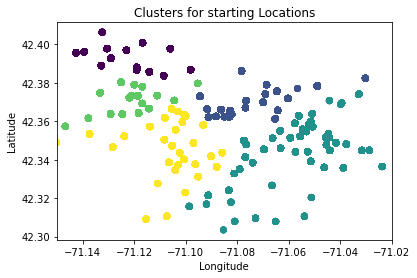

In [58]:
clusterLocation["five"] = five_means.predict(clusterLocation_scaled)

# Plotting
plt.title('Clusters for starting Locations')
plt.scatter(clusterLocation.Longitude, clusterLocation.Latitude, c = clusterLocation["five"])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-71.15, -71.02)
plt.show()

## Bike Demand Pattern Cluster - Trip Durations on Starting Times

In [68]:
clusterTime = pd.DataFrame({'Start_Time' : bike_station['start_time'].dt.hour, 'Trip_Length' : bike_station['trip_duration']/pd.Timedelta(minutes=1)})
scaler = StandardScaler()
scaler.fit(clusterTime)
clusterTime_scaled = scaler.transform(clusterTime)
clusterTime_scaled_df = pd.DataFrame(clusterTime_scaled, columns=clusterTime.columns, index=clusterTime.index)
clusterTime_scaled_df.head()

,Start_Time,Trip_Length
0,-3.021462,0.013915
1,-1.305628,0.041158
2,0.410206,-0.121975
3,0.410206,0.675099
4,0.410206,0.671574


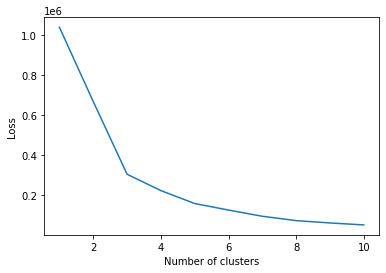

In [64]:
k_max = 10 #möglicherweise ändern

clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(clusterTime_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)
    
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

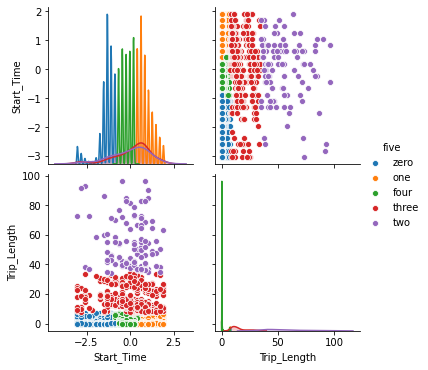

In [70]:
# refit algorithm
five_means = KMeans(n_clusters=5)
five_means.fit(clusterTime_scaled)

numbers = ["zero", "one", "two", "three", "four", "five", "six"]

clusterTime_scaled_df["five"] = five_means.predict(clusterTime_scaled)
clusterTime_scaled_df["five"] = clusterTime_scaled_df["five"].apply(lambda x: numbers[x])
sns.pairplot(data=clusterTime_scaled_df, hue="five")

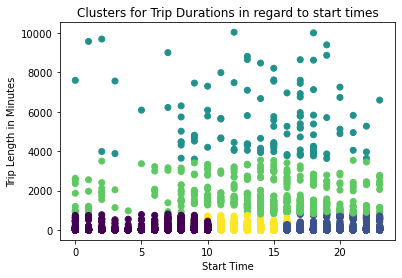

In [73]:
clusterTime["five"] = five_means.predict(clusterTime_scaled)

# Plotting
plt.title('Clusters for Trip Durations in regard to start times')
plt.scatter(clusterTime.Start_Time, clusterTime.Trip_Length, c = clusterTime["five"])
plt.xlabel('Start Time')
plt.ylabel('Trip Length in Minutes')
plt.show()

## Bike Demand Pattern Cluster - Trip Durations on Days of a Year

In [84]:
clusterTimeDays = pd.DataFrame({'Start_Time' : bike_station['start_time'].dt.dayofyear, 'Trip_Length' : bike_station['trip_duration']/pd.Timedelta(minutes=1)})
scaler = StandardScaler()
scaler.fit(clusterTimeDays)
clusterTimeDays_scaled = scaler.transform(clusterTimeDays)
clusterTimeDays_scaled_df = pd.DataFrame(clusterTimeDays_scaled, columns=clusterTimeDays.columns, index=clusterTimeDays.index)
clusterTimeDays_scaled_df.head()

,Start_Time,Trip_Length
0,-2.502786,0.013915
1,-2.502786,0.041158
2,-2.502786,-0.121975
3,-2.502786,0.675099
4,-2.502786,0.671574


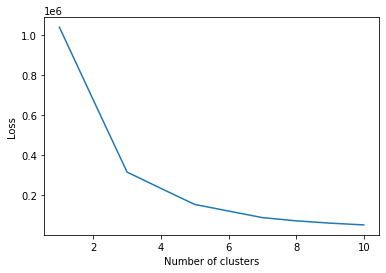

In [85]:
k_max = 10 #möglicherweise ändern

clusters = []
losses = []

for k in range(k_max):
    model = KMeans(n_clusters=k+1)
    model.fit(clusterTimeDays_scaled)
    clusters.append(k+1)
    losses.append(model.inertia_)
    
plt.plot(clusters, losses)
plt.ylabel("Loss")
plt.xlabel("Number of clusters")
plt.show()

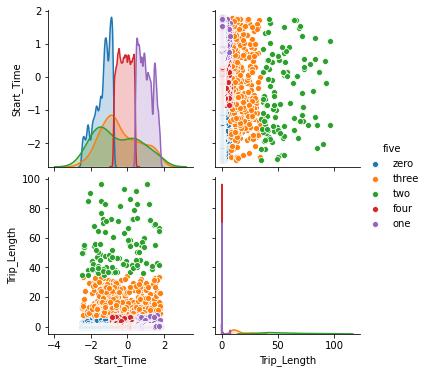

In [86]:
# refit algorithm
five_means = KMeans(n_clusters=5)
five_means.fit(clusterTimeDays_scaled)

numbers = ["zero", "one", "two", "three", "four", "five", "six"]

clusterTimeDays_scaled_df["five"] = five_means.predict(clusterTimeDays_scaled)
clusterTimeDays_scaled_df["five"] = clusterTimeDays_scaled_df["five"].apply(lambda x: numbers[x])
sns.pairplot(data=clusterTimeDays_scaled_df, hue="five")

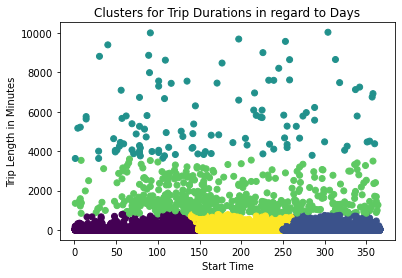

In [87]:
clusterTimeDays["five"] = five_means.predict(clusterTimeDays_scaled)

# Plotting
plt.title('Clusters for Trip Durations in regard to Days')
plt.scatter(clusterTimeDays.Start_Time, clusterTimeDays.Trip_Length, c = clusterTimeDays["five"])
plt.xlabel('Start Time')
plt.ylabel('Trip Length in Minutes')
plt.show()

## 4 Predictive Analytics

___

**Feature Engineering:**

___

**Model Building:**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
bike.drop('hour', axis=1, inplace=True)
bike.head()

1. Linear Regression
2. Polynomial Regression

___

**Model Evaluation:**

___

**Outlook:**

___